<a href="https://colab.research.google.com/github/FranciscoNav/springboard/blob/main/how_to_format_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **How to format data**

---



In [6]:
#Import Libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

In [7]:
#Load the Dataset
data =  load_iris()
df = pd.DataFrame(data.data, columns= data.feature_names)
df['species'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
# Multiple column feature matrix to convert to Numpy array
df.loc[:,feature_names]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
# convert to numpy array
x = df.loc[:, feature_names].values

In [13]:
#make sure Numpu array is two dimensional
x.shape

(150, 4)

In [15]:
# Pandas series to convert to NumPy Array
df.loc[:,'species']

y= df.loc[:,'species'].values

y.shape

(150,)

# **`Linear Regression`**

---



In [19]:
#Import Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [22]:
# Load the Dataset
df = pd.read_csv('/content/sample_data/linear.csv')
df.head()

,x,y
0,0.000000,-51.000000
1,25.000000,-12.000000
2,117.583220,134.907414
3,108.922466,134.085180
4,69.887445,NaN


In [23]:
#Look at the shape of the dataframe
df.shape

(102, 2)

In [24]:
# There are missing values in the Y column which is what we will predict
df.isnull().sum()

,0
x,0
y,8


In [26]:
# Revmove entire rows from dataframe if they contain any nans in them or 'all'
df = df.dropna(how='any')

#check shape - notice it is different
df.shape

(94, 2)

### Arrange Data into Features Matrix and Target Vector

In [29]:
# convert x column to numpy array
x = df.loc[:, ['x']].values
x.shape

(94, 1)

In [31]:
# create target vector
y = df.loc[:,'y'].values
y.shape

(94,)

### Linner Regression time

In [33]:
# Make a linear regression instance
reg = LinearRegression(fit_intercept=True)

# if you want to see wha you can tune for a model, you can use the help function
# help(LinearRegression)

In [39]:
# Training the model on the data, storing the information learned from the data
#model is learning the relationship between x and y
reg.fit(x,y)

LinearRegression()

In [37]:
# Predit the values of the new data. uses the information the model leaned during the model traning process
# input needs to be two dimensional (reshape makes input two dimensional)
reg.predict(x[0].reshape(-1,1))

# Predict for multiple observation at once
reg.predict(x[0:10])

array([-50.99119328, -11.39905237, 135.223663  , 121.50775193,
       102.37289634,  31.0056196 ,   4.46431068,  74.84474012,
        20.82088826,  72.16749711])

Measure Model Performance

In [40]:
# R^2, the coefficient of determination to quantify your model's performance. Best score is 1.0
score = reg.score(x,y)

print(score)

0.979881836115762


Equation of the line for the regression

In [42]:
reg.coef_
reg.intercept_
m = reg.coef_[0]
b = reg.intercept_

# following slope intercept form
print("formula: y = {:.2f}x = {:.2f}".format(m,b))

formula: y = 1.58x = -50.99


Plotting the best fit linear regession line in red

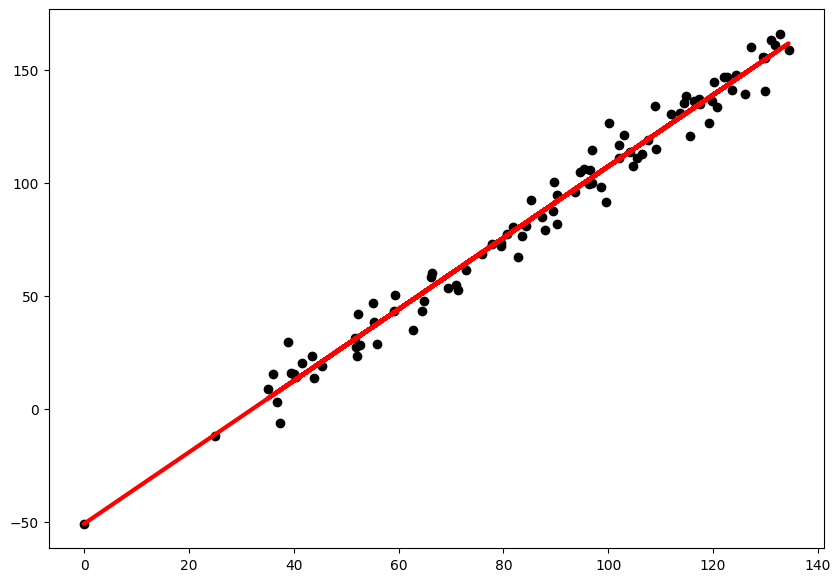

In [44]:
fig, ax = plt.subplots(nrows =1, ncols =1, figsize = (10,7));

ax.scatter(x,y, color='black');
ax.plot(x, reg.predict(x), color='red',linewidth=3)